In [36]:
#multiple linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [27]:
# Load the dataset
file_path = 'mlr4.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB
None
              y         x1          x2 x3
0  17028.177259  53.536779  192.995897  A
1  16700.706352  53.062480  202.658257  C
2  18059.031725  58.655435  199.928552  A
3  17982.376799  54.636051  199.534987  B
4  14825.265941  50.133840  195.991861  B


In [ ]:
#multiple linear regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt



In [28]:
# Separate features and target
X = data.drop(columns=['y'])  # Drop the target column
y = data['y']  # Target variable


In [29]:
# Identify categorical columns
categorical_features = ['x3']  # Categorical feature in the dataset

# Define a preprocessor for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-Hot Encoding
    ],
    remainder='passthrough'  # Keep other columns as is
)


In [30]:
# Define the random seed (student number)
random_seed = 23286954

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Preprocess the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [31]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_transformed, y_train)


LinearRegression()

In [32]:
# Predict on the test set
y_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients and performance metrics
feature_names = preprocessor.get_feature_names_out()
print("Model Coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Model Coefficients:
cat__x3_B: 72.9432
cat__x3_C: 64.9219
remainder__x1: 295.0317
remainder__x2: 66.5163

Intercept: -12690.6766

Mean Squared Error (MSE): 629671.8963
R-squared: 0.8531


In [33]:
# Save the predictions to a CSV file for further analysis
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('predictions.csv', index=False)


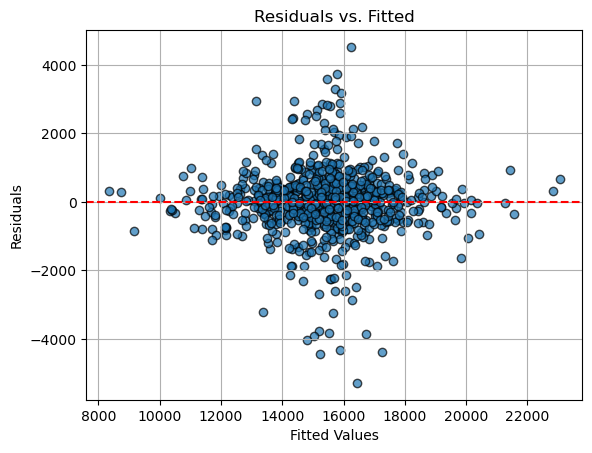

         feature        VIF
0      cat__x3_B   2.223840
1      cat__x3_C   1.927874
2  remainder__x1  68.630473
3  remainder__x2  70.581164


In [38]:
# Residuals vs. Fitted Plot
residuals = y_train - model.predict(X_train_transformed)
plt.scatter(model.predict(X_train_transformed), residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Multicollinearity Check Using VIF
# Step 1: Get feature names after encoding
feature_names = preprocessor.get_feature_names_out()

# Step 2: Convert the transformed training data to a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# Step 3: Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_transformed_df.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_transformed_df.values, i)
    for i in range(X_train_transformed_df.shape[1])
]

# Step 4: Display VIF
print(vif_data)
